In [1]:
!pip install pyneuroml
!pip install libneuroml
import math
from neuroml import NeuroMLDocument
from neuroml import Cell
from neuroml import IonChannelHH
from neuroml import GateHHRates
from neuroml import BiophysicalProperties
from neuroml import MembraneProperties
from neuroml import ChannelDensity
from neuroml import HHRate
from neuroml import SpikeThresh
from neuroml import SpecificCapacitance
from neuroml import InitMembPotential
from neuroml import IntracellularProperties
from neuroml import IncludeType
from neuroml import Resistivity
from neuroml import Morphology, Segment, Point3DWithDiam
from neuroml import Network, Population
from neuroml import PulseGenerator, ExplicitInput
import numpy as np
from pyneuroml import pynml
from pyneuroml.lems import LEMSSimulation

     |████████████████████████████████| 27.7 MB 110 kB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 95 kB 4.1 MB/s 
     |████████████████████████████████| 221 kB 72.4 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 
  Created wheel for airspeed: filename=airspeed-0.5.17-py3-none-any.whl size=11505 sha256=c57b84eae5ef0c66c82f0014bdc5ab2d4daf23f0e4ddfcff4f6fd3b28f5576f1
  Stored in directory: /root/.cache/pip/wheels/34/b2/2a/f1991182a1b88a52e023820f90d4f673e76022f0f9eb2c851b
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26324 sha256=8046a3490e7b88f43766fd0d1824697596f8b42b7f1ce79d838a469c33b43d63
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built airspeed typing


In [3]:
# Simulation bits
sim_id = "4L_currents"
simulation = LEMSSimulation(sim_id=sim_id, duration=1300, dt=0.01)

# Include the NeuroML model file
simulation.include_neuroml2_file("network.iso.cell34.nml")

# Assign target for the simulation
simulation.assign_simulation_target("net_1")

# Recording information from the simulation
simulation.create_output_file(id="output0", file_name=sim_id + ".dat")
simulation.add_column_to_output_file("output0", column_id="v1L", quantity="hn3L_pop[0]/v")
simulation.add_column_to_output_file("output0", column_id="na", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/na_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="k1", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/k1_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="k2", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/k2_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="caf", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/caf_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="cas", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/cas_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="h", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/h_chan_den/iDensity")
simulation.add_column_to_output_file("output0", column_id="p", quantity="hn3L_pop[0]/bio_phys_HN34/membraneProperties/p_chan_den/iDensity")


# Save LEMS simulation to file
sim_file = simulation.save_to_file()

# Run the simulation using the default jNeuroML simulator
pynml.run_lems_with_jneuroml(sim_file, max_memory="2G", nogui=True, plot=False)

pyNeuroML >>> Written LEMS Simulation 4L_currents to file: LEMS_4L_currents.xml


True

pyNeuroML >>> Generating plot: Membrane potential
pyNeuroML >>> Saved image to 4L_currents-v.png of plot: Membrane potential


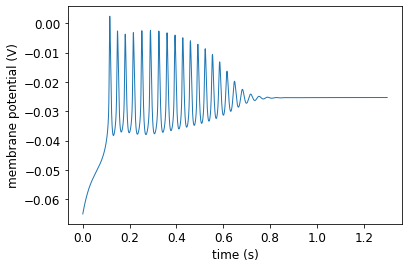

In [6]:
# Plot the data
data_array = np.loadtxt(sim_id + ".dat")

pynml.generate_plot([data_array[:, 0]], [data_array[:, 1]], "Membrane potential",
                    show_plot_already=False, save_figure_to=sim_id + "-v.png", 
                    xaxis="time (s)", yaxis="membrane potential (V)")

pyNeuroML >>> Generating plot: current density
pyNeuroML >>> Saved image to 4L_currents-iden.png of plot: current density


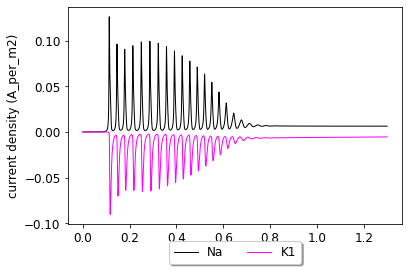

In [7]:
 #large
pynml.generate_plot([data_array[:, 0], data_array[:, 0]], 
                    [data_array[:, 2], data_array[:, 3]], 
                    "current density", labels=["Na", "K1"], colors=["black", "#ff00ff"],
                    show_plot_already=False, save_figure_to=sim_id + "-iden.png", 
                    xaxis="time (s)", yaxis="current density (A_per_m2)")

pyNeuroML >>> Generating plot: current density
pyNeuroML >>> Saved image to 4L_currents-iden.png of plot: current density


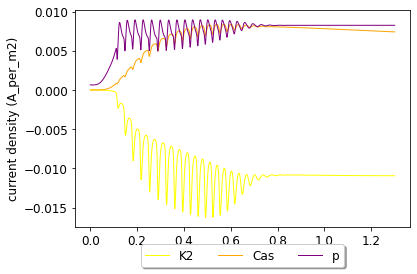

In [9]:
#small
pynml.generate_plot([data_array[:, 0], data_array[:, 0], data_array[:, 0]], 
                    [data_array[:, 4], data_array[:, 6], data_array[:, 8]], 
                    "current density", labels=["K2", "Cas", "p"],
                    colors=["#ffff00", "#ffA500", "#800080"], 
                    show_plot_already=False, save_figure_to=sim_id + "-iden.png", 
                    xaxis="time (s)", yaxis="current density (A_per_m2)")

pyNeuroML >>> Generating plot: current density
pyNeuroML >>> Saved image to 4L_currents-iden.png of plot: current density


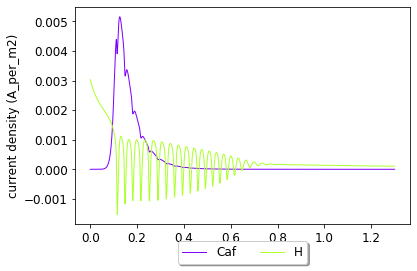

In [11]:
#even smaller
pynml.generate_plot([data_array[:, 0], data_array[:, 0]], 
                    [data_array[:, 5], data_array[:, 7]], 
                    "current density", labels=["Caf", "H"], 
                    colors=["#8000ff", "#Adff2f"], 
                    show_plot_already=False, save_figure_to=sim_id + "-iden.png", 
                    xaxis="time (s)", yaxis="current density (A_per_m2)")